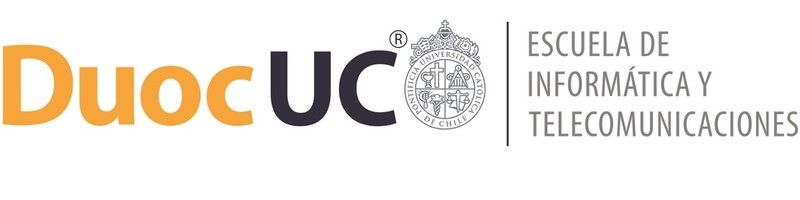

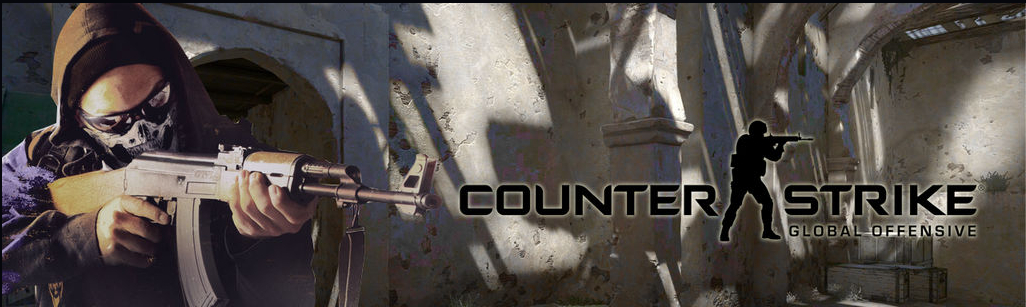

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Alejandro Valenzuela
* Marian Moreno
* Kiara Caycho

Docente: CHRISTIAN MANUEL ALVAREZ CARREÑO

Sección: 801V

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

Primero cargamos las librerias que utilizaremos para la limpieza de la data

In [4]:

import numpy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Ahora cargamos el data, el cual contiene los datos de rondas y partidas del juego de counter strike GO


In [5]:

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";")

df = df.replace('/t', ';', regex=True)

Saving ML.csv to ML.csv


<ipython-input-5-5cb51a62da3a>:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


## Fase 2: Data Understanding

*En* esta sección analizaremos los datos con los cuales vamos a trabajar, para eso se definio el data como la variable 'df' donde realizaremos una serie de llamados para detectar nulos, columnas de tipo object, adquerir una visión de los datos en puro, definir conversiones, normalizaciones, outliers y columnas con las cuales no trabajaremos.

Con la función **"info()"** podremos identificar el tipo de dato de cada columna

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

Ahora con **"columns"** visulizaremos las columnas que contiene la data definida como 'df'.

In [7]:
df.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

**"describe()"** nos entrega información sobre la data completa como cantidad de datos(count), media(mean), cuartiles entre otros.

In [8]:
df.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


La siguiente función nos permite detectar los valores nullos que se encuentran en la data para despues "limpiarlos".

In [9]:
df.isna().sum()

Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

Al ser datos valores Categóricos las columnas de MatchWinner y Team se procedió a reemplazar los null por la "moda" de cada uno.

In [10]:
#llenar valores faltantes y control de null

#matchwinner
MatchWinner = df['MatchWinner'].mode()[0]
df['MatchWinner'].fillna(MatchWinner, inplace=True)

#Team
Team = df['Team'].mode()[0]
df['Team'].fillna(Team, inplace=True)

Tras haber limpiado o en este caso transformar los valores nulos se procede a transformar las columnas con tipo de valor 'Object'.

Primero partiremos con las columnas de cuyo tipo de dato es categórico nominal como en el caso de las columnas map y team donde las columnas seran divididas en columnas binarias(0 y 1).

In [11]:
#Map
one_hot_map = pd.get_dummies(df['Map'])
df = pd.concat([df, one_hot_map], axis=1)

#Team
one_hot_team = pd.get_dummies(df['Team'])
df = pd.concat([df, one_hot_team], axis=1)

De esta manera quedaran representadas las columnas para después crear los modelos.

In [12]:
print(one_hot_map)

       de_dust2  de_inferno  de_mirage  de_nuke
0             0           1          0        0
1             0           1          0        0
2             0           1          0        0
3             0           1          0        0
4             0           1          0        0
...         ...         ...        ...      ...
79152         0           0          1        0
79153         0           0          1        0
79154         0           0          1        0
79155         0           0          1        0
79156         0           0          1        0

[79157 rows x 4 columns]


Ahora transformaremos las columnas de Roundwinner y MatchWinner de tipo object a booleanos y por último a las codificaremos a 0 (False) y 1 (True).

Object --> Boolean

In [13]:
df['RoundWinner'] = df['RoundWinner'].astype(bool)
df['MatchWinner'] = df['MatchWinner'].astype(bool)
df['RoundWinner'] = df['RoundWinner'].astype(bool)

Boolean --> Int

In [14]:
df['Survived'] = df['Survived'].astype(int)
df['MatchWinner'] = df['MatchWinner'].astype(int)
df['RoundWinner'] = df['RoundWinner'].astype(int)

Ahora transformaremos las columnas TimeAlive, FirstKillTime y TravelledDistance de Object a Int.

In [15]:
df['TimeAlive'] = df['TimeAlive'].str.replace('.', '').astype(int)
df['FirstKillTime'] = df['FirstKillTime'].str.replace('.', '').astype(int)


<ipython-input-15-4af809baa7c7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TimeAlive'] = df['TimeAlive'].str.replace('.', '').astype(int)
<ipython-input-15-4af809baa7c7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['FirstKillTime'] = df['FirstKillTime'].str.replace('.', '').astype(int)


In [16]:
df['TravelledDistance'] = [x.replace('.', '').replace(',', '.') for x in df['TravelledDistance']]
df['TravelledDistance'] = [int(float(x)) for x in df['TravelledDistance']]
print(df['TravelledDistance'])

0        10083140737457000
1        60960883184688400
2         5642252383582750
3         8963473313229970
4        10865649734393100
               ...        
79152     4048177852924460
79153     3213477612567870
79154     6005168938274500
79155    27987628542398100
79156     9867724708696010
Name: TravelledDistance, Length: 79157, dtype: int64


Eliminaremos tablas que ya no utilizaremos

In [17]:
df.columns
dfclean=df.drop(['Unnamed: 0','Team','Map','AbnormalMatch'],axis=1)

# Análisis de Outliers

Se analizarán las columnas con valores Estructurado numéricos continuos

1.TimeAlive

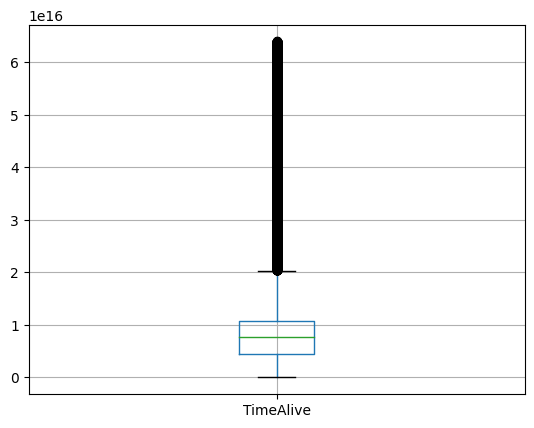

In [18]:
dfclean.boxplot(column=['TimeAlive'])
plt.show()

In [19]:
#TimeAlive outliers
q1 = dfclean['TimeAlive'].quantile(0.25)
q3 = dfclean['TimeAlive'].quantile(0.75)
ric = q3 - q1
limite_inferior = q1 - 0.9 * ric
limite_superior = q3 + 0.9 * ric
data_outliers_timealive = dfclean[(dfclean['TimeAlive'] >= limite_inferior) & (dfclean['TimeAlive'] <= limite_superior)]

2.TravelledDistance

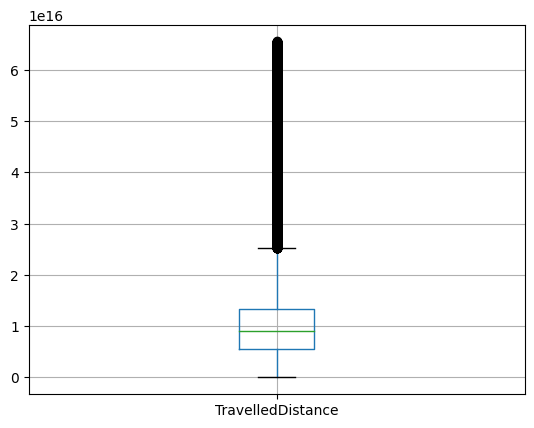

In [20]:
data_outliers_timealive.boxplot(column=['TravelledDistance'])
plt.show()

Se retiró una gran cantidad de datos debido a los outliers de timealive, el equipo decide que para los modelos que se quieren realizar más adelante se conserve la columna TimeAlive y se retire TravelledDistance.

3.FirstKillTime

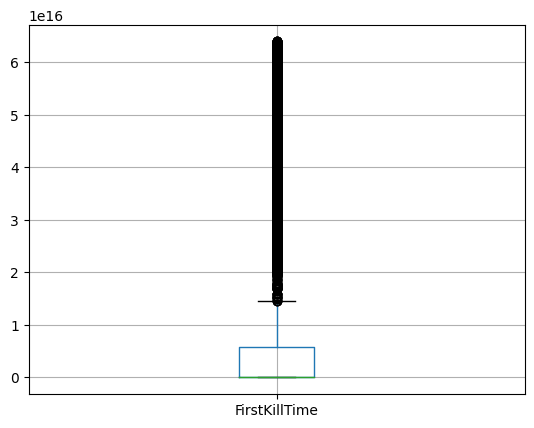

In [21]:
data_outliers_timealive.boxplot(column=['FirstKillTime'])
plt.show()

Dado que se repite la misma situación que la columna anterior y tras el análisis del equipo se decidio quitar la columna Firstkilltime por la gran cantidad de datos que se pierden y si se mantiene podra afectar gravemente el modelo a futuro.

4.Rnonlethalgrenadesthrown

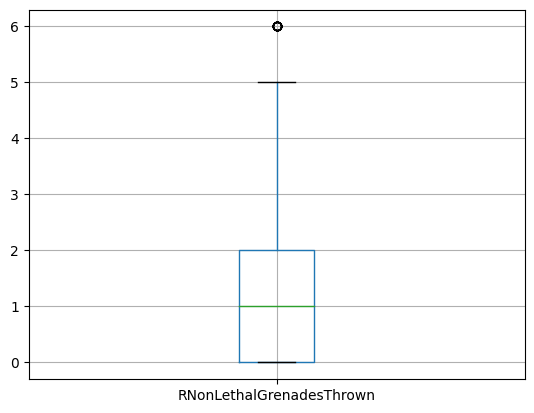

In [22]:
data_outliers_timealive.boxplot(column=['RNonLethalGrenadesThrown'])
plt.show()

In [23]:
data_outliers_timealive.drop(data_outliers_timealive.query('RNonLethalGrenadesThrown > 5').index, inplace=True)

<ipython-input-23-74039de5b1eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outliers_timealive.drop(data_outliers_timealive.query('RNonLethalGrenadesThrown > 5').index, inplace=True)


5.Rlethalgrenadesthrown

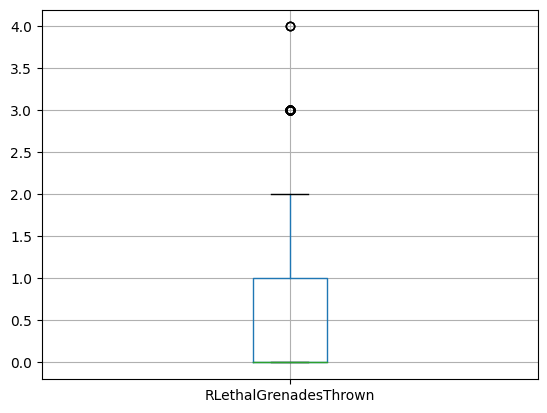

In [24]:
data_outliers_timealive.boxplot(column=['RLethalGrenadesThrown'])
plt.show()

In [25]:
data_outliers_timealive.drop(data_outliers_timealive.query('RLethalGrenadesThrown > 2').index, inplace=True)

<ipython-input-25-b273d5b1b8e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outliers_timealive.drop(data_outliers_timealive.query('RLethalGrenadesThrown > 2').index, inplace=True)


6.Matchassists

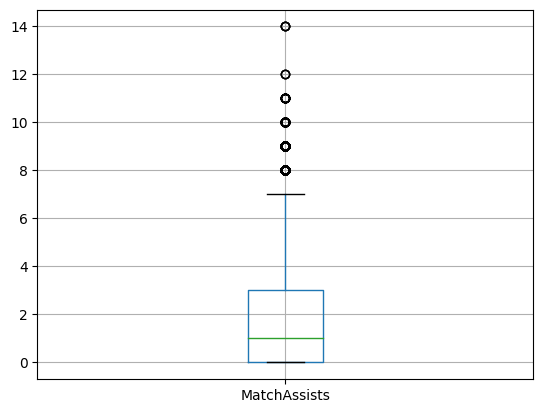

In [26]:
data_outliers_timealive.boxplot(column=['MatchAssists'])
plt.show()

In [27]:
data_outliers_timealive.drop(data_outliers_timealive.query('MatchAssists > 7').index, inplace=True)

<ipython-input-27-a66db0ce1198>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outliers_timealive.drop(data_outliers_timealive.query('MatchAssists > 7').index, inplace=True)


7.Matchkills

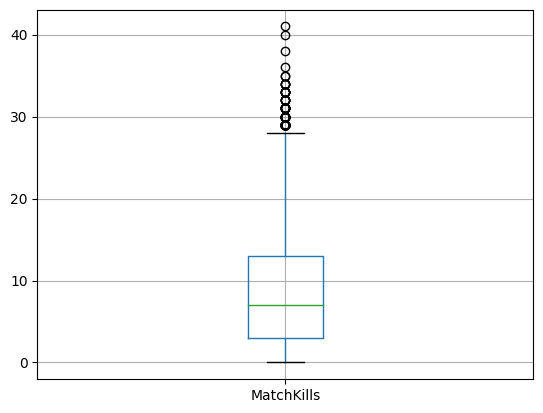

In [28]:
data_outliers_timealive.boxplot(column=['MatchKills'])
plt.show()

In [29]:
data_outliers_timealive.drop(data_outliers_timealive.query('MatchKills > 25').index, inplace=True)

<ipython-input-29-40a70a913bc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outliers_timealive.drop(data_outliers_timealive.query('MatchKills > 25').index, inplace=True)


8.RoundKills

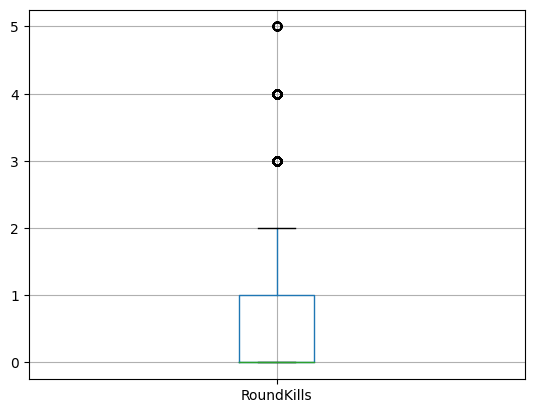

In [30]:
data_outliers_timealive.boxplot(column=['RoundKills'])
plt.show()

In [31]:
data_outliers_timealive.drop(data_outliers_timealive.query('RoundKills > 2').index, inplace=True)

<ipython-input-31-2a9682536c3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outliers_timealive.drop(data_outliers_timealive.query('RoundKills > 2').index, inplace=True)


9.MatchFlankKills

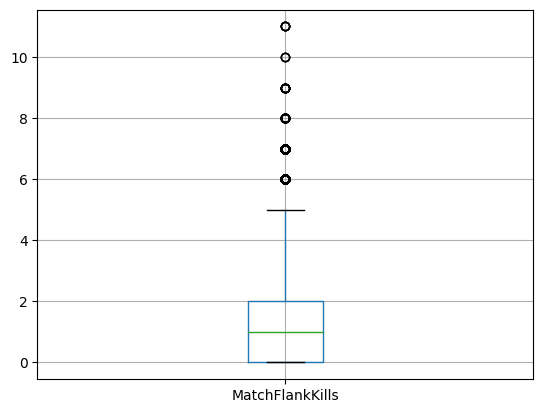

In [32]:
data_outliers_timealive.boxplot(column=['MatchFlankKills'])
plt.show()

In [33]:
data_outliers_timealive.drop(data_outliers_timealive.query('MatchFlankKills > 5').index, inplace=True)

<ipython-input-33-d8783a40961a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outliers_timealive.drop(data_outliers_timealive.query('MatchFlankKills > 5').index, inplace=True)


10.MatchHeadshots

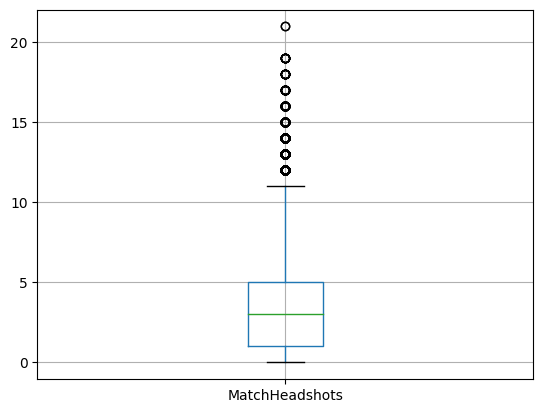

In [34]:
data_outliers_timealive.boxplot(column=['MatchHeadshots'])
plt.show()

In [35]:
data_outliers_timealive.drop(data_outliers_timealive.query('MatchHeadshots > 11').index, inplace=True)

<ipython-input-35-df4c7e06783a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_outliers_timealive.drop(data_outliers_timealive.query('MatchHeadshots > 11').index, inplace=True)


In [36]:
data_outliers_timealive.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60279 entries, 1 to 79154
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   InternalTeamId               60279 non-null  int64  
 1   MatchId                      60279 non-null  int64  
 2   RoundId                      60279 non-null  int64  
 3   RoundWinner                  60279 non-null  int64  
 4   MatchWinner                  60279 non-null  int64  
 5   Survived                     60279 non-null  int64  
 6   TimeAlive                    60279 non-null  int64  
 7   TravelledDistance            60279 non-null  int64  
 8   RLethalGrenadesThrown        60279 non-null  int64  
 9   RNonLethalGrenadesThrown     60279 non-null  int64  
 10  PrimaryAssaultRifle          60279 non-null  float64
 11  PrimarySniperRifle           60279 non-null  float64
 12  PrimaryHeavy                 60279 non-null  float64
 13  PrimarySMG      

Se eliminan las tablas que no se van a utilizar post análisis outliers.

In [37]:
dfclean2=data_outliers_timealive.drop(['FirstKillTime','TravelledDistance'],axis=1)

# Análisis Data Post Limpieza

Se genera una nueva variable para trabajar dfclean2 como df2.

In [38]:
df2 = dfclean2

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60279 entries, 1 to 79154
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   InternalTeamId               60279 non-null  int64  
 1   MatchId                      60279 non-null  int64  
 2   RoundId                      60279 non-null  int64  
 3   RoundWinner                  60279 non-null  int64  
 4   MatchWinner                  60279 non-null  int64  
 5   Survived                     60279 non-null  int64  
 6   TimeAlive                    60279 non-null  int64  
 7   RLethalGrenadesThrown        60279 non-null  int64  
 8   RNonLethalGrenadesThrown     60279 non-null  int64  
 9   PrimaryAssaultRifle          60279 non-null  float64
 10  PrimarySniperRifle           60279 non-null  float64
 11  PrimaryHeavy                 60279 non-null  float64
 12  PrimarySMG                   60279 non-null  float64
 13  PrimaryPistol   

In [40]:
df2.describe()

,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,TimeAlive,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,...,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,de_dust2,de_inferno,de_mirage,de_nuke,CounterTerrorist,Terrorist
count,60279.000000,60279.000000,60279.000000,60279.000000,60279.000000,60279.000000,6.027900e+04,60279.000000,60279.000000,60279.000000,...,60279.000000,60279.000000,60279.000000,60279.000000,60279.000000,60279.000000,60279.000000,60279.000000,60279.000000,60279.000000
mean,1.495363,249.763549,12.228935,0.711044,0.479305,0.411868,6.399882e+15,0.513628,1.334677,0.684155,...,7.816752,1.070024,1.754989,3.478127,0.240863,0.376250,0.234145,0.148742,0.499959,0.500041
std,0.499983,149.644210,7.224896,0.453281,0.499576,0.492176,3.545745e+15,0.594618,1.193456,0.460758,...,5.640663,1.245660,1.681736,2.816421,0.427611,0.484448,0.423466,0.355837,0.500004,0.500004
min,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,129.000000,6.000000,0.000000,0.000000,0.000000,3.875845e+15,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,232.000000,12.000000,1.000000,0.000000,0.000000,6.706313e+15,0.000000,1.000000,1.000000,...,7.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,372.000000,18.000000,1.000000,1.000000,1.000000,9.065449e+15,1.000000,2.000000,1.000000,...,12.000000,2.000000,3.000000,5.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,511.000000,36.000000,1.000000,1.000000,1.000000,1.648724e+16,2.000000,5.000000,1.000000,...,25.000000,5.000000,7.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
InternalTeamId,60279.0,1.495363e+00,4.999826e-01,1.0,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
MatchId,60279.0,2.497635e+02,1.496442e+02,4.0,1.290000e+02,2.320000e+02,3.720000e+02,5.110000e+02
RoundId,60279.0,1.222894e+01,7.224896e+00,1.0,6.000000e+00,1.200000e+01,1.800000e+01,3.600000e+01
RoundWinner,60279.0,7.110436e-01,4.532814e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
MatchWinner,60279.0,4.793046e-01,4.995757e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Survived,60279.0,4.118681e-01,4.921756e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
TimeAlive,60279.0,6.399882e+15,3.545745e+15,0.0,3.875845e+15,6.706313e+15,9.065449e+15,1.648724e+16
RLethalGrenadesThrown,60279.0,5.136283e-01,5.946184e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
RNonLethalGrenadesThrown,60279.0,1.334677e+00,1.193456e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
PrimaryAssaultRifle,60279.0,6.841554e-01,4.607576e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Fase 3: Data Preparation

In [42]:
df2.head(10)

,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,TimeAlive,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,...,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,de_dust2,de_inferno,de_mirage,de_nuke,CounterTerrorist,Terrorist
1,1,4,1,1,1,0,4348662552266170,0,0,0.0,...,0,0,0,0,0,1,0,0,0,1
2,1,4,1,1,1,0,3735469847054540,0,0,0.0,...,0,0,0,0,0,1,0,0,0,1
3,1,4,1,1,1,0,4767886136441470,0,0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,1,4,1,1,1,1,5312251089027310,1,1,0.0,...,0,0,0,0,0,1,0,0,0,1
5,2,4,1,1,0,1,5312251089027310,0,0,0.0,...,0,0,0,0,0,1,0,0,1,0
6,2,4,1,1,0,1,5312251089027310,0,2,0.0,...,0,0,0,0,0,1,0,0,1,0
7,2,4,1,1,0,1,5312251089027310,0,0,0.0,...,0,0,1,0,0,1,0,0,1,0
9,2,4,1,1,0,1,5312251089027310,0,0,0.0,...,2,0,0,2,0,1,0,0,1,0
10,1,4,2,1,1,1,5287222815345200,0,0,0.0,...,0,0,0,0,0,1,0,0,0,1
11,1,4,2,1,1,0,4874256299590430,0,1,0.0,...,0,0,0,0,0,1,0,0,0,1


## Normalización

Se realiza normalización de TimeAlive debido a los altos valores que maneja la columna.

1.TimeAlive

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
TimeAliveS = scaler.fit_transform(df2[['TimeAlive']])
df2['TimeAlive'] = TimeAliveS


2.MatchKills

In [44]:
MatchKillsS = scaler.fit_transform(df2[['MatchKills']])
df2['MatchKills'] = MatchKillsS

3.RoundKills

In [45]:
RoundKillsS = scaler.fit_transform(df2[['RoundKills']])
df2['RoundKills'] = RoundKillsS

4.TeamStartingEquipmentValue

In [46]:
TeamStartingEquipmentValueS = scaler.fit_transform(df2[['TeamStartingEquipmentValue']])
df2['TeamStartingEquipmentValue'] = TeamStartingEquipmentValueS

5.RNonLethalGrenadesThrown

In [47]:
RNonLethalGrenadesThrownS = scaler.fit_transform(df2[['RNonLethalGrenadesThrown']])
df2['RNonLethalGrenadesThrown'] = RNonLethalGrenadesThrownS

6.RLethalGrenadesThrown

In [48]:
RLethalGrenadesThrownS = scaler.fit_transform(df2[['RLethalGrenadesThrown']])
df2['RLethalGrenadesThrown'] = RLethalGrenadesThrownS

7.MatchFlankKills

In [49]:
MatchFlankKillsS = scaler.fit_transform(df2[['MatchFlankKills']])
df2['MatchFlankKills'] = MatchFlankKillsS

8.MatchHeadshots

In [50]:
MatchHeadshotsS= scaler.fit_transform(df2[['MatchHeadshots']])
df2['MatchHeadshots'] = MatchHeadshotsS

9.RoundHeadshots

In [51]:
RoundHeadshotsS= scaler.fit_transform(df2[['RoundHeadshots']])
df2['RoundHeadshots'] = RoundHeadshotsS

10.RoundStartingEquipmentValue

In [52]:
RoundStartingEquipmentValueS= scaler.fit_transform(df2[['RoundStartingEquipmentValue']])
df2['RoundStartingEquipmentValue'] = RoundStartingEquipmentValueS

11.RoundflankKills

In [53]:
RoundFlankKillsS= scaler.fit_transform(df2[['RoundFlankKills']])
df2['RoundFlankKills'] = RoundFlankKillsS

12.MatchAssists

In [54]:
MatchAssistsS= scaler.fit_transform(df2[['MatchAssists']])
df2['MatchAssists'] = MatchAssistsS

# Análisis de Correlaciones

Se genera un mapa de calor entre las columnas elegidas por el equipo para analizar las correlaciones, e identificar si son positivas o negativas.

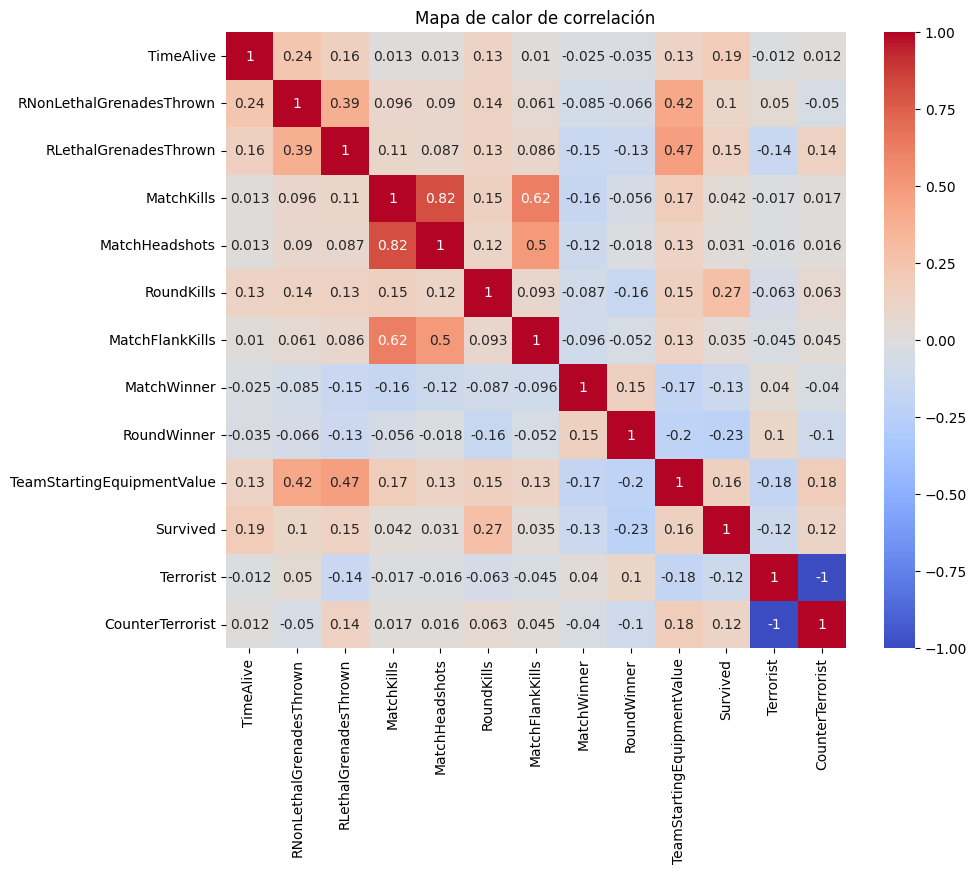

In [55]:
import seaborn as sns
subset = df2[["TimeAlive","RNonLethalGrenadesThrown",'RLethalGrenadesThrown',"MatchKills",'MatchHeadshots','RoundKills','MatchFlankKills',"MatchWinner",'RoundWinner',"TeamStartingEquipmentValue",'Survived','Terrorist','CounterTerrorist']]
correlation_matrix = subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

Tras el análisis que se realizó al mapa de calor se encontraron varios hallazgos que llamaron nuestra atención.

El primer hallazgo que identificamos y realizamos un gráfico de barras, tiene una correlación positiva entre las columnas Matchkills y FlankKills, donde se identifica que a medida que aumentas las kills por partida, aumentan las FlankKills.

Text(0, 0.5, 'FlankKills')

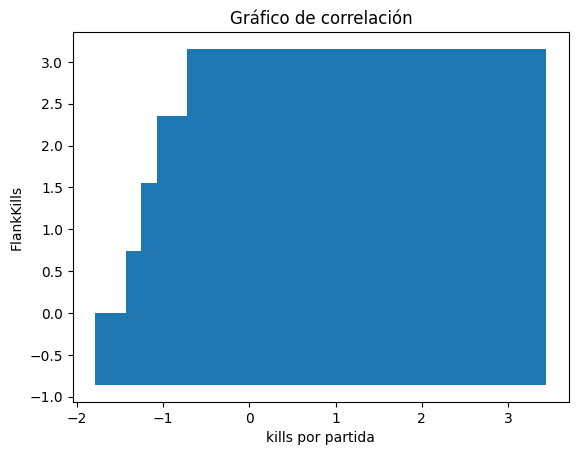

In [56]:
plt.bar(df2['MatchKills'],df2['MatchFlankKills'] )
plt.title('Gráfico de correlación')
plt.xlabel('kills por partida')
plt.ylabel('FlankKills')

El segundo hallazgo que se identificó fue que no solo aumentan las FlankKills si no también los Headshots por partida a medida que crecen las kills.

Text(0, 0.5, 'headshots por partida')

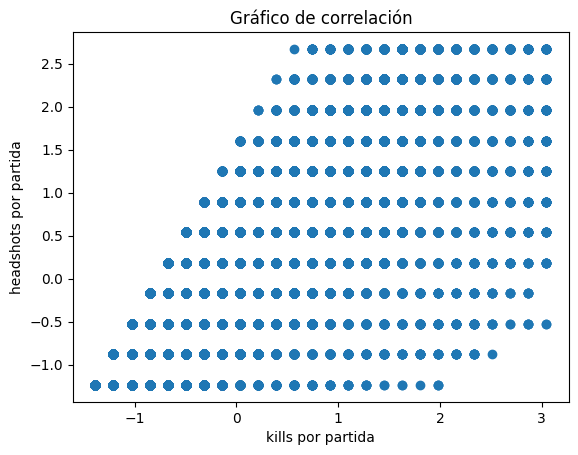

In [57]:
plt.scatter(df2['MatchKills'],df2['MatchHeadshots'] )
plt.title('Gráfico de correlación')
plt.xlabel('kills por partida')
plt.ylabel('headshots por partida')

Si bien este Hallazgo posee una correlación bastante baja, no deja de ser interesante, ya que esto nos indica que las granadas no letales tiene inferencia en el tiempo de vida de los jugadores y que en un macrojuego esto podría afectar el resultado.

Text(0, 0.5, 'TimeAlive')

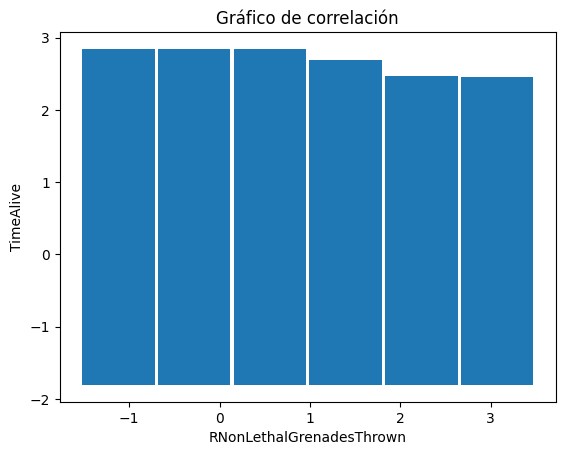

In [58]:
plt.bar(df2['RNonLethalGrenadesThrown'], df2['TimeAlive'] )
plt.title('Gráfico de correlación')
plt.xlabel('RNonLethalGrenadesThrown')
plt.ylabel('TimeAlive')

El siguiente hallazgo nos indica que a medida que los jugadores tengan un mayor valor de equipo inicial el uso de pistola primaria queda relegado o también se puede inferir que a medida que el poder de equipamiento crece de los jugadores la psitola primaria pasa a un segundo plano.

Text(0, 0.5, 'TeamStartingEquipmentValue')

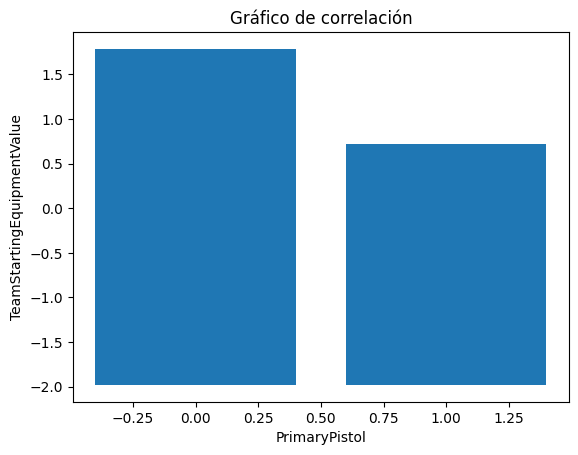

In [59]:
plt.bar(df2['PrimaryPistol'],df2['TeamStartingEquipmentValue'] )
plt.title('Gráfico de correlación')
plt.xlabel('PrimaryPistol')
plt.ylabel('TeamStartingEquipmentValue')

### Fase 4: Modeling

### Regresión

Importamos las librerías necesarias para el modelado.

In [60]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

Creamos una nueva variable de trabajo

In [61]:
df3 = df2

Creamos las matrices para las columnas que utilizarmos en el modelo.

Para este modelo por solicitud de cliente se debe utilizar una variable numérica continua, por lo tanto se eligió la columna de kills por disparo en la cabeza por partida (MatchHeadshots) el cual será nuestro variable dependiente(y) y las variables independientes (x) serán matchkills, matchflankKills, teamStartingequipamentvalue y PrimaryAssaultRifle.

Matriz_y (contiene la variable a predecir).

In [62]:
columna = df3['MatchHeadshots']
matriz_y=columna.values.reshape(-1,1)

Matriz_x (Variables que se utilizaran para pedecir 'y')

In [63]:
columna = ['MatchKills', 'MatchFlankKills','TeamStartingEquipmentValue','PrimaryAssaultRifle']
matriz_X= df3[columna].to_numpy()

Para dividir el train y test,
se utilizará un 70/30 en división de la data y un random_state de 42 para asegurar que la división se realice de manera optima al azar.

In [64]:
X = matriz_X
y = matriz_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

####Entrenamiento

Ahora creamos Los 4 modelos que utilizaremos que son regresión lineal, Support Vector Regression, árbol de deciciones y random forest.

In [65]:
lr = LinearRegression()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

Realizamos el entrenamiento

In [66]:
lr.fit(X_train, y_train)
svr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-66-d8b58c96545e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor()

Generamos métricas coef. de determinación

Importamos Gradio y generamos el modelo.

**"Se recuerda que los valores estan normalizados"** debido a esto las cantidades de headshots van de -1 a 1.

In [67]:
!pip install -q gradio
import gradio as gr
import requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.7 MB/s eta 0:

### Clasificación



In [98]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [101]:
df4 = df2

In [180]:
label_encoder = LabelEncoder()
matriz_Y1 = label_encoder.fit_transform(df4['de_dust2'])



In [171]:
matriz_X2 = df4[['MatchKills', 'MatchFlankKills', 'TeamStartingEquipmentValue', 'PrimaryAssaultRifle']].values


In [181]:
X = matriz_X2
y = matriz_Y1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [182]:
lrc = LogisticRegression()
svc = SVC()
rfc = RandomForestClassifier()

In [183]:
lrc.fit(X_train, y_train)
svc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Fase 5: Evaluation

###Regresion

Generamos métricas coef. de determinación

 El MSE nos indicara si el modelo ha logrado predecir perfectamente los valores reales sin ninguna discrepancia si su valor es 0 significa que no hay errores

El MAE  evalua el rendimiento de un modelo de regresión proporcionando una medida de la magnitud promedio del error

R2 nos indica que tan ajustado esta el modelo, si el valor es 1 significa el modelo esta ajustado perfectamente y si es 0 no esta ajustado al modelo lo que significa que el modelo no es capaz de predecir la variable.

In [ ]:
models = [lrc, svr, dtr, rfr]
for model in models:
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model.__class__.__name__}: MAE={mae:.2f}, MSE={mse:.2f}, R2={r2:.2f}')

Se analizó los 4 coeficientes, ninguno alcanza un número óptimo, pero el más cercano es el modelo **SVR** que cuenta con un valor más cercano a 0 con 0.30 de error, en el MSE y el R2 cuenta con su valor más cercano a 1 con 0.70 de ajuste al modelo.

###Clasificacion


In [184]:
models2 = [lrc, svc, rfc]
for model in models2:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model.__class__.__name__}')
    print(f'{accuracy=:.4f}')

LogisticRegression
accuracy=0.7573
SVC
accuracy=0.7573
RandomForestClassifier
accuracy=0.7096


## Fase 5: Deployment

###Regresión

In [ ]:
def predict(MatchKills:int,
            MatchFlankKills:int,
            TeamStartingEquipmentValue:int,
            PrimaryAssaultRifle:int):

    input_df9=[[MatchKills,
                MatchFlankKills,
                TeamStartingEquipmentValue,
                PrimaryAssaultRifle]]
    prediction= svr.predict(input_df9)[0]
    return prediction

inputs=[gr.inputs.Slider(minimum=-1,maximum=1,label="aesinato por partida"),
        gr.inputs.Slider(minimum=-1,maximum=1,label="asesinatos sin ser visto"),
        gr.inputs.Slider(minimum=-1,maximum=1,label="TeamStartingEquipmentValue"),
        gr.inputs.Slider(minimum=0,maximum=1,label="uso rifle de asalto? 1:si 0:no")]

output=gr.outputs.Textbox(label="kills por headshots")

gr.Interface(fn=predict,
             inputs=inputs,
             outputs=output).launch(debug=True,share=True)

###Clasificacion


In [128]:
import pickle

In [200]:
modelo_cla = 'modelo_clasificacion.pkl'
pickle.dump(lrc, open(modelo_cla, 'wb'))
m_clasificacion = pickle.load(open(modelo_cla, 'rb'))
print(m_clasificacion)



if m_clasificacion.predict(X_test)[0] == 1 :
    print(f'El mapa es de_nuke')
else:
    print(f'No esta jugande en de_nuke')


LogisticRegression()
No esta jugande en de_nuke
